In [1]:
%cd /home/gmo/Downloads/fake_data

/home/gmo/Downloads/fake_data


In [2]:
import pandas as pd
import unicodedata
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import ImageDraw, ImageFont, ImageEnhance, ImageFilter
import os
from random import randint
import random
from gimei import Gimei
import pickle as pkl
from sklearn.utils import shuffle
from image_utils import ImageText
from shutil import rmtree

In [3]:
mpl.rcParams['figure.figsize'] = (20, 20)
def path2np_img(path):
    i = Image.open(path)
    return np.array(i)

In [33]:
name = Gimei().name

In [37]:
name.first.kanji, name.last.kanji

('圭亮', '平山')

In [44]:
def gen_name():
    name = Gimei().name
    return name.first.kanji, name.last.kanji

gen_name()

('昌紀', '宮崎')

In [4]:
%load_ext autoreload
%autoreload 1

In [5]:
df_a = pd.read_csv("samples/fullname_u.csv", chunksize=1200)
df = next(df_a)

In [6]:
df.head()

,セ,タカエ,name
0,ウノ,アヤ,name
1,ウノ,タカシ,name
2,ウノ,モトハル,name
3,オカ,ケンタロウ,name
4,サワ,シンイチロウ,name


In [7]:
char_df = df['セ'].apply(lambda x: unicodedata.name(x[0]))
filtered_dt = df[char_df.str.contains('CJK')].reset_index(drop=True)

In [8]:
max(filtered_dt['セ'].apply(lambda x: len(x))), \
max(filtered_dt['タカエ'].apply(lambda x: len(x)))

(3, 3)

In [9]:
index, row = next(filtered_dt.iterrows())
row['セ'], row['タカエ']

('一', 'ユリエ')

In [10]:
filtered_dt[:5]

,セ,タカエ,name
0,一,ユリエ,name
1,一丁田,倖誠,name
2,一丁田,敦史,name
3,一丁田,晶也,name
4,一丁田,智也,name


In [11]:
from image_utils import ImageText

i_empty = np.full((53 * 3, 565 * 3, 3), 255)
i_empty[:, :10] = 80
i_empty[:, -10:] = 80
i_empty[:10, :] = 80
i_empty[:, :5] = 40
i_empty[:, -5:] = 40
i_empty[:5, :] = 40
i_empty[-5:, :] = 40
i = Image.fromarray(i_empty.astype("uint8"))
img = ImageText(i)

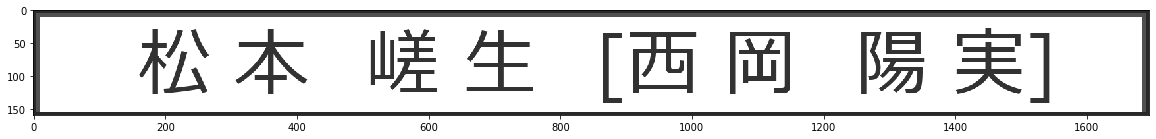

In [52]:
from PIL import Image
from image_utils import ImageText
import numpy as np

iterrow = shuffle(filtered_dt).reset_index(drop=True).iterrows()

i_empty = np.full((53 * 3, 565 * 3, 3), 255)
i_empty[:, :10] = 80
i_empty[:, -10:] = 80
i_empty[:10, :] = 80
i_empty[:, :5] = 40
i_empty[:, -5:] = 40
i_empty[:5, :] = 40
i_empty[-5:, :] = 40
bg = Image.fromarray(i_empty.astype("uint8"))

index1, row1 = next(iterrow)
index2, row2 = next(iterrow)

f = lambda x: ' '.join(x)

first_name1, last_name1 = gen_name() # row1['セ'], row1['タカエ']
first_name2, last_name2 = gen_name() # row2['セ'], row2['タカエ']
text = f'{f(last_name1)}_{f(first_name1)}_[{f(last_name2)}_{f(first_name2)}]'

if get_text_size(font_filename="newfont/meiryo.ttc", font_size=110, text=text)[0] > 565*3-300+200:
    text = f'{(last_name1)}_{(first_name1)}_[{(last_name2)}_{(first_name2)}]'

img = ImageText(bg)

img.write_text_box((160, -135), text, box_width=565*3-300, font_filename="newfont/meiryo.ttc",
                   font_size=110, color=(50, 50, 50), place='justify', justify_last_line=True)

plt.imshow(img.image)

In [18]:
565*3-300

1395

In [17]:
def get_text_size(font_filename, font_size, text):
    font = ImageFont.truetype(font_filename, font_size)
    return font.getsize(text)

get_text_size(font_filename="newfont/meiryo.ttc", font_size=110, text=text)

(1622, 138)

(53, 565, 4)


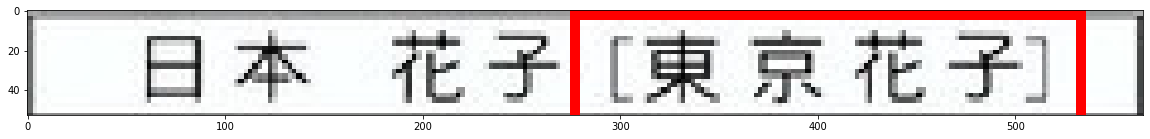

In [13]:
i = path2np_img("source/Picture1 (bản sao khác).png")
print(i.shape)
plt.imshow(i)

In [54]:
mode = 'save'
path = 'res/name'
rmtree(path)
os.makedirs(path, exist_ok=True)
# for n in range(len(names)):
iterrow = shuffle(filtered_dt).reset_index(drop=True).iterrows()
l_i_2 = []
for n in range(1, 49*2*4 + 1):
    i_empty = np.full((53 * 3, 565 * 3, 3), 255)
    i_empty[:, :10] = 80
    i_empty[:, -10:] = 80
    i_empty[:10, :] = 80
    i_empty[:, :5] = 40
    i_empty[:, -5:] = 40
    i_empty[:5, :] = 40
    i_empty[-5:, :] = 40

    bg = Image.fromarray(i_empty.astype("uint8"))
    
    index, row1 = next(iterrow)
    index, row2 = next(iterrow)
    
    f = lambda x: ' '.join(x)

    first_name1, last_name1 = gen_name() # row1['セ'], row1['タカエ']
    first_name2, last_name2 = gen_name() # row2['セ'], row2['タカエ']
    true_text = f'{last_name1} {first_name1} [{last_name2} {first_name2}]'
    text = f'{f(last_name1)}_{f(first_name1)}_[{f(last_name2)}_{f(first_name2)}]'

    if get_text_size(font_filename="newfont/meiryo.ttc", font_size=110, text=text)[0] > 565*3-300+200:
        text = f'{(last_name1)}_{(first_name1)}_[{(last_name2)}_{(first_name2)}]'

    img = ImageText(bg)
    img.write_text_box((160, -135), text, box_width=565*3-300, font_filename="newfont/meiryo.ttc",
                       font_size=110, color=(50, 50, 50), place='justify', justify_last_line=True)
    i = img.image
    l_i_2.append(i)
    
    if n % (49*4) == 0 :
        os.makedirs(f"{path}_a4", exist_ok=True)
        images_iter = iter(l_i_2)
        h, w = 49, 520
        pad = np.full((20, w, 3), 255, 'uint8')
        col1, col2, col3, col4 = [], [], [], []
        cols = [col1, col2, col3, col4]
        for ik in cols:
            for j in range(49):
                img = next(images_iter)
                k = img.resize((w, h), Image.ANTIALIAS)
                k = np.array(k)
                ik.extend((k, pad))
        colskk = list(map(np.vstack, cols))

        bg = np.full((3508,2480,3), 255, dtype='uint8')
        coords = [[90+590*i, 80] for i in range(len(colskk))]
        for colkk, coord in zip(colskk, coords):
            x, y = coord
            bg[y:y+colkk.shape[0], x:x+colkk.shape[1]] = colkk
        Image.fromarray(bg).save(f"{path}_a4/{int(n / (49*4)):03d}.png")
        l_i_2 = []
    
    if mode=='plot':
        plt.imshow(i)
        break
    elif mode=='save':
        i.save(f"{path}/{n:03d}_{true_text}.png")
        with open(f"{path}/{n:03d}_{true_text}.txt", "w") as f:
            f.write(f"{true_text}")